## **Linear Regression: Hyundai Car Price Prediction**

### **Importing library**

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tabulate import tabulate

### **About data**

In [457]:
# Memplot data mentah
df = pd.read_csv('dataset.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12.0
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8.0
2,45774419,8467.0,-,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2.0
3,45769185,3607.0,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0.0
4,45809263,11726.0,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467.0,-,MERCEDES-BENZ,CLK 200,1999.0,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5.0
19233,45778856,15681.0,831,HYUNDAI,Sonata,2011.0,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8.0
19234,45804997,26108.0,836,HYUNDAI,Tucson,2010.0,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4.0
19235,45793526,5331.0,1288,CHEVROLET,Captiva,2007.0,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4.0


In [458]:
# Memilih baris yang dibutuhkan (Manufacturer: HYUNDAI) sebagai df2
df2 = df[df.Manufacturer == 'HYUNDAI']
df2

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
5,45802912,39493.0,891,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2,160931.0,4.0,Automatic,Front,04-May,Left wheel,White,4.0
7,45816158,549.0,751,HYUNDAI,Sonata,2013.0,Sedan,Yes,Petrol,2.4,216118.0,4.0,Automatic,Front,04-May,Left wheel,Grey,12.0
14,45732604,59464.0,891,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2,76000.0,4.0,Automatic,Front,04-May,Left wheel,White,4.0
16,45772281,7683.0,810,HYUNDAI,Elantra,2016.0,Sedan,Yes,Petrol,1.8,121840.0,4.0,Automatic,Front,04-May,Left wheel,Blue,12.0
17,45797221,28382.0,810,HYUNDAI,Elantra,2016.0,Sedan,Yes,Petrol,1.8,54317.0,4.0,Automatic,Front,04-May,Left wheel,White,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841,470.0,831,HYUNDAI,Elantra,2017.0,Sedan,Yes,Petrol,1.6,25635.0,4.0,Automatic,Front,04-May,Left wheel,Black,12.0
19222,45732720,10036.0,639,HYUNDAI,Sonata,2014.0,Sedan,Yes,LPG,2,735970.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4.0
19233,45778856,15681.0,831,HYUNDAI,Sonata,2011.0,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8.0
19234,45804997,26108.0,836,HYUNDAI,Tucson,2010.0,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4.0


In [459]:
# Memilih kolom yang dibutuhkan sebagai df3
# Independent variabel(x) adalah 'Price', 'Model', 'Prod_year', 'Category', 'Fuel_type', 'Mileage', 'Gear_box_type', 'Color'
# Dependent variabel(y) adalah Price
df3 = df2[['Price', 'Model', 'Prod_year', 'Category', 'Fuel_type', 'Mileage', 'Color']]
df3

,Price,Model,Prod_year,Category,Fuel_type,Mileage,Color
5,39493.0,Santa FE,2016.0,Jeep,Diesel,160931.0,White
7,549.0,Sonata,2013.0,Sedan,Petrol,216118.0,Grey
14,59464.0,Santa FE,2016.0,Jeep,Diesel,76000.0,White
16,7683.0,Elantra,2016.0,Sedan,Petrol,121840.0,Blue
17,28382.0,Elantra,2016.0,Sedan,Petrol,54317.0,White
...,...,...,...,...,...,...,...
19215,470.0,Elantra,2017.0,Sedan,Petrol,25635.0,Black
19222,10036.0,Sonata,2014.0,Sedan,LPG,735970.0,Silver
19233,15681.0,Sonata,2011.0,Sedan,Petrol,161600.0,Red
19234,26108.0,Tucson,2010.0,Jeep,Diesel,116365.0,Grey


In [460]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3769 entries, 5 to 19236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3769 non-null   float64
 1   Model      3769 non-null   object 
 2   Prod_year  3769 non-null   float64
 3   Category   3769 non-null   object 
 4   Fuel_type  3769 non-null   object 
 5   Mileage    3769 non-null   float64
 6   Color      3769 non-null   object 
dtypes: float64(3), object(4)
memory usage: 235.6+ KB


In [461]:
# Melihat jenis-jenis baris pada setiap kolom object
print("Model =", df3.Model.unique())
print("Category =", df3.Category.unique())
print("Fuel_type =", df3.Fuel_type.unique())
print("Color =", df3.Color.unique())

Model = ['Santa FE' 'Sonata' 'Elantra' 'H1' 'Tucson' 'Genesis'
 'Elantra sport limited' 'I30' 'Veloster' 'Sonata SPORT' 'Elantra SE'
 'Accent' 'Grandeur' 'kona' 'IX35' 'Elantra limited' 'Sonata 2.0t'
 'Sonata S' 'Sonata blue edition' 'Sonata hybrid' 'Elantra LIMITED'
 'Elantra GT' 'Sonata HYBRID' 'Santa FE Ultimate' 'Sonata Hibrid' 'Getz'
 'Elantra gt' 'Elantra Limited' 'Elantra GLS / LIMITED' 'Tucson TURBO'
 'Ioniq' 'Sonata LPG' 'IX35 2.0' 'Veloster R-spec' 'Azera' 'Sonata Hybrid'
 'Elantra Gt' 'Tucson Limited' 'Elantra Se' 'Elantra 2014' 'Lantra'
 'Sonata Limited' 'Tucson Se' 'Sonata 2.4L' 'Lantra LIMITED'
 'Veloster Turbo' 'Sonata Sport' 'Santa FE long' 'Tucson SE'
 'H1 grandstarex' 'H1 GRAND STAREX' 'Accent SE' 'Elantra 2016'
 'Veloster TURBO' 'Veloster remix' 'Elantra LIMITEDI' 'Elantra i30'
 'Santa FE sport' 'Sonata sport' 'Sonata SE LIMITED' 'H1 starixs'
 'Accent GS' 'Sonata LIMITED' 'Elantra GS' 'i20' 'i40' 'Sonata SE'
 'Veracruz' 'Galloper' 'Sonata სასწრაფოდ' 'Elantra se']
Cat

In [462]:
# Melihat 5 jenis Model terbanyak
Model = df3['Model'].value_counts()
Model = pd.DataFrame(Model).reset_index().head(5)
Model

,index,Model
0,Sonata,1079
1,Elantra,922
2,Santa FE,533
3,H1,437
4,Tucson,429


In [463]:
# Memplot data dengan 5 jenis Model terbanyak
df4 = df3.loc[df3['Model'].isin(['Sonata', 'Elantra', 'Santa FE', 'H1', 'Tucson'])]
# Melihat 5 jenis Category terbanyak
Category = df4['Category'].value_counts()
Category = pd.DataFrame(Category).reset_index().head(5)
Category

,index,Category
0,Sedan,1963
1,Jeep,979
2,Minivan,284
3,Universal,142
4,Hatchback,18


In [464]:
# Memplot data dengan 5 jenis Category terbanyak
df5 = df4.loc[df4['Category'].isin(['Sedan', 'Jeep', 'Minivan', 'Universal', 'Hatchback'])]
# Melihat 5 jenis Fuel_type terbanyak
Fuel_type = df5['Fuel_type'].value_counts()
Fuel_type = pd.DataFrame(Fuel_type).reset_index().head(5)
Fuel_type

,index,Fuel_type
0,Diesel,1325
1,Petrol,1282
2,LPG,611
3,Hybrid,167
4,CNG,1


In [465]:
# Memplot data dengan 5 jenis Fuel_type terbanyak
df6 = df5.loc[df5['Fuel_type'].isin(['Diesel', 'Petrol', 'LPG', 'Hybrid', 'CNG'])]
# Melihat 5 jenis Color terbanyak
Color = df6['Color'].value_counts()
Color = pd.DataFrame(Color).reset_index().head(5)
Color

,index,Color
0,Silver,968
1,White,815
2,Black,560
3,Grey,520
4,Orange,193


*Real data*

In [466]:
# Memplot data dengan 5 jenis Color terbanyak
df7 = df6.loc[df6['Color'].isin(['Silver', 'White', 'Black', 'Grey', 'Orange'])]
df7

,Price,Model,Prod_year,Category,Fuel_type,Mileage,Color
5,39493.0,Santa FE,2016.0,Jeep,Diesel,160931.0,White
7,549.0,Sonata,2013.0,Sedan,Petrol,216118.0,Grey
14,59464.0,Santa FE,2016.0,Jeep,Diesel,76000.0,White
17,28382.0,Elantra,2016.0,Sedan,Petrol,54317.0,White
20,18826.0,Elantra,2012.0,Sedan,Petrol,112645.0,Silver
...,...,...,...,...,...,...,...
19211,50037.0,Santa FE,2016.0,Jeep,Diesel,121902.0,Black
19215,470.0,Elantra,2017.0,Sedan,Petrol,25635.0,Black
19222,10036.0,Sonata,2014.0,Sedan,LPG,735970.0,Silver
19234,26108.0,Tucson,2010.0,Jeep,Diesel,116365.0,Grey


- Data tersebut adalah daya yang akan digunakan (df7) untuk melakukan prediksi harga

In [467]:
# Melihat jenis-jenis baris pada setiap kolom object
print("Model =", df7.Model.unique())
print("Category =", df7.Category.unique())
print("Fuel_type =", df7.Fuel_type.unique())
print("Color =", df7.Color.unique())

Model = ['Santa FE' 'Sonata' 'Elantra' 'H1' 'Tucson']
Category = ['Jeep' 'Sedan' 'Universal' 'Minivan' 'Hatchback']
Fuel_type = ['Diesel' 'Petrol' 'Hybrid' 'LPG']
Color = ['White' 'Grey' 'Silver' 'Black' 'Orange']


In [468]:
#Mengubah data object menjadi float

# Model
event_strength = {'Santa FE': 1.0, 'Sonata': 2.0, 'Elantra': 3.0, 'H1': 4.0, 'Tucson': 5.0}
df7['Model'] = df7['Model'].apply(lambda x: event_strength[x])
# Category
event_strength = {'Jeep': 1.0, 'Sedan': 2.0, 'Universal': 3.0, 'Minivan': 4.0, 'Hatchback': 5.0}
df7['Category'] = df7['Category'].apply(lambda x: event_strength[x])
# Fuel_type
event_strength = {'Diesel': 1.0, 'Petrol': 2.0, 'Hybrid': 3.0, 'LPG': 4.0}
df7['Fuel_type'] = df7['Fuel_type'].apply(lambda x: event_strength[x])
# Color
event_strength = {'White': 1.0, 'Grey': 2.0, 'Silver': 3.0, 'Black': 4.0, 'Orange': 5.0}
df7['Color'] = df7['Color'].apply(lambda x: event_strength[x])

df8 = df7.sort_values('Color', ascending=True)
df8

C:\Users\Nanda\AppData\Local\Temp\ipykernel_2256\337747714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Model'] = df7['Model'].apply(lambda x: event_strength[x])
C:\Users\Nanda\AppData\Local\Temp\ipykernel_2256\337747714.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Category'] = df7['Category'].apply(lambda x: event_strength[x])
C:\Users\Nanda\AppData\Local\Temp\ipykernel_2256\337747714.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Price,Model,Prod_year,Category,Fuel_type,Mileage,Color
5,39493.0,1.0,2016.0,1.0,1.0,160931.0,1.0
8940,44213.0,5.0,2016.0,1.0,1.0,90924.0,1.0
8911,40387.0,1.0,2014.0,1.0,1.0,56809.0,1.0
8897,9500.0,4.0,2005.0,4.0,2.0,240000.0,1.0
8850,16308.0,2.0,2016.0,2.0,4.0,268872.0,1.0
...,...,...,...,...,...,...,...
18437,6429.0,2.0,2014.0,2.0,4.0,531500.0,5.0
18443,13172.0,2.0,2016.0,2.0,4.0,299337.0,5.0
2126,9252.0,2.0,2015.0,2.0,4.0,431626.0,5.0
18396,10036.0,2.0,2016.0,2.0,4.0,354569.0,5.0


In [469]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3056 entries, 5 to 11536
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3056 non-null   float64
 1   Model      3056 non-null   float64
 2   Prod_year  3056 non-null   float64
 3   Category   3056 non-null   float64
 4   Fuel_type  3056 non-null   float64
 5   Mileage    3056 non-null   float64
 6   Color      3056 non-null   float64
dtypes: float64(7)
memory usage: 191.0 KB


- Seluruh data (df8) sudah dalam bentuk numerik.

In [470]:
df8.shape

(3056, 7)

In [471]:
df8.describe()

,Price,Model,Prod_year,Category,Fuel_type,Mileage,Color
count,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3.056000e+03,3056.000000
mean,22980.242147,2.757853,2013.857003,1.929974,2.038940,1.575618e+05,2.606021
std,16046.745565,1.240982,2.545077,0.839105,1.107092,1.420061e+05,1.232093
min,3.000000,1.000000,1999.000000,1.000000,1.000000,0.000000e+00,1.000000
25%,12544.000000,2.000000,2012.000000,1.000000,1.000000,7.234850e+04,1.000000
50%,18817.000000,3.000000,2014.000000,2.000000,2.000000,1.203340e+05,3.000000
75%,31650.000000,4.000000,2016.000000,2.000000,2.000000,1.802728e+05,3.000000
max,131308.000000,5.000000,2020.000000,5.000000,4.000000,1.678000e+06,5.000000


### **Handling Missing Values**

In [472]:
df8.isnull().sum()

Price        0
Model        0
Prod_year    0
Category     0
Fuel_type    0
Mileage      0
Color        0
dtype: int64

- Data tidak memiliki missing values.

### **Exploratory Data Analysis (EDA)**

In [473]:
# Recall data
df8

,Price,Model,Prod_year,Category,Fuel_type,Mileage,Color
5,39493.0,1.0,2016.0,1.0,1.0,160931.0,1.0
8940,44213.0,5.0,2016.0,1.0,1.0,90924.0,1.0
8911,40387.0,1.0,2014.0,1.0,1.0,56809.0,1.0
8897,9500.0,4.0,2005.0,4.0,2.0,240000.0,1.0
8850,16308.0,2.0,2016.0,2.0,4.0,268872.0,1.0
...,...,...,...,...,...,...,...
18437,6429.0,2.0,2014.0,2.0,4.0,531500.0,5.0
18443,13172.0,2.0,2016.0,2.0,4.0,299337.0,5.0
2126,9252.0,2.0,2015.0,2.0,4.0,431626.0,5.0
18396,10036.0,2.0,2016.0,2.0,4.0,354569.0,5.0


In [474]:
# Keterangan nomor data
table = [['No', 'Model', 'Category', 'Fuel_type', 'Color'],
         ['1', 'Santa FE', 'Jeep', 'Diesel', 'White'],
         ['2', 'Sonata', 'Sedan', 'Petrol', 'Grey'],
         ['3', 'Elantra', 'Universal', 'Hybrid', 'Silver'],
         ['4', 'H1', 'Minivan', 'LPG', 'Black'],
         ['5', 'Tucson', 'Hatchback', '-', 'Orange']]
print('-'*16, "KETERANGAN NOMOR DATA", '-'*16)
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

---------------- KETERANGAN NOMOR DATA ----------------
╒══════╤══════════╤════════════╤═════════════╤═════════╕
│   No │ Model    │ Category   │ Fuel_type   │ Color   │
╞══════╪══════════╪════════════╪═════════════╪═════════╡
│    1 │ Santa FE │ Jeep       │ Diesel      │ White   │
├──────┼──────────┼────────────┼─────────────┼─────────┤
│    2 │ Sonata   │ Sedan      │ Petrol      │ Grey    │
├──────┼──────────┼────────────┼─────────────┼─────────┤
│    3 │ Elantra  │ Universal  │ Hybrid      │ Silver  │
├──────┼──────────┼────────────┼─────────────┼─────────┤
│    4 │ H1       │ Minivan    │ LPG         │ Black   │
├──────┼──────────┼────────────┼─────────────┼─────────┤
│    5 │ Tucson   │ Hatchback  │ -           │ Orange  │
╘══════╧══════════╧════════════╧═════════════╧═════════╛


C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


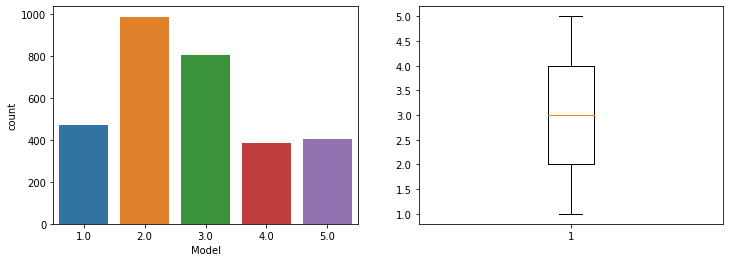

In [475]:
# Distribusi dari Model
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df8['Model'])
f.add_subplot(1,2,2)
plt.boxplot(df8['Model'])
plt.show()

- Sebagian besar model mobil hyundai ada di nomor 2 dan 3, yaitu Santa FE dan Sonata.
- Data tidak memiliki outliers.

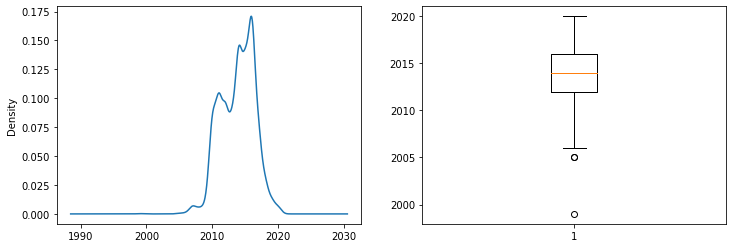

In [476]:
# Distribusi dari Prod_year
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df8['Prod_year'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df8['Prod_year'])
plt.show()

- Density dari distribusi tahun produksi (Prod_year) berada di tahun 2015an
- Data memiliki outliers

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


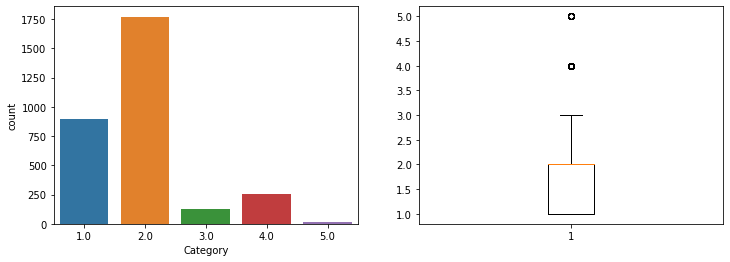

In [477]:
# Distribusi dari Category
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df8['Category'])
f.add_subplot(1,2,2)
plt.boxplot(df8['Category'])
plt.show()

- Sebagian besar kategori mobil hyundai ada di nomor 2 dan 1, yaitu Sedan dan Jeep.
- Data memiliki outliers.

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


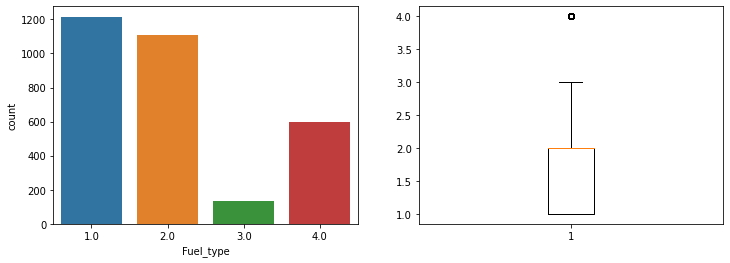

In [478]:
# Distribusi dari Fuel_type
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df8['Fuel_type'])
f.add_subplot(1,2,2)
plt.boxplot(df8['Fuel_type'])
plt.show()

- Sebagian besar tipe bahan bakar mobil hyundai ada di nomor 1 dan 2, yaitu Diesel dan Petrol.
- Data memiliki outliers.

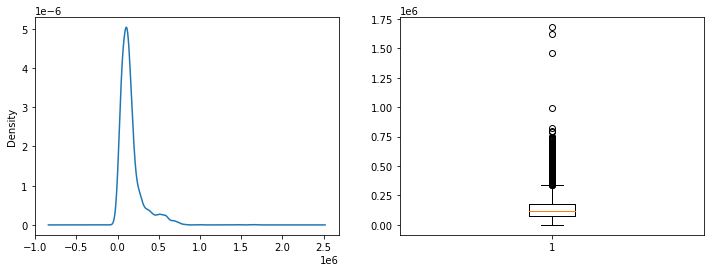

In [479]:
# Distribusi dari Mileage
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df8['Mileage'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df8['Mileage'])
plt.show()

- Density dari distribusi jarak tempuh (Mileage) (dalam km) mobil hyundai berada di angka 200000an km.
- Data memiliki banyak outliers.

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


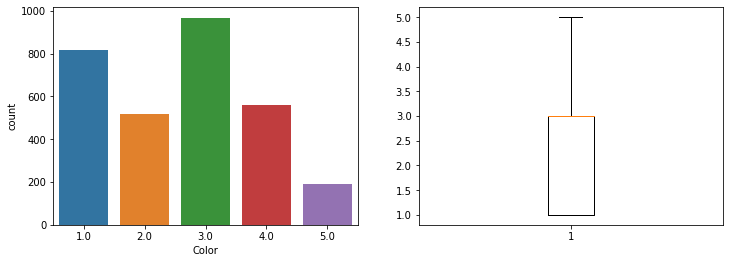

In [480]:
# Distribusi dari Color
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df8['Color'])
f.add_subplot(1,2,2)
plt.boxplot(df8['Color'])
plt.show()

- Sebagian besar warna mobil hyundai ada di nomor 3 dan 1, yaitu Silver dan White.
- Data tidak memiliki outliers.

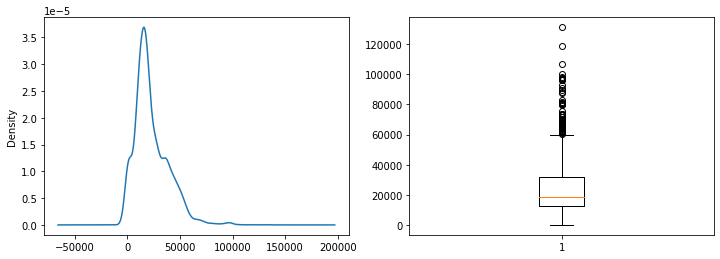

In [481]:
# Distribusi dari Price
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df8['Price'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df8['Price'])
plt.show()

- Density dari distribusi harga mobil hyundai berada di angka 20000an US$.
- Data memiliki banyak outliers.

<Figure size 864x288 with 0 Axes>

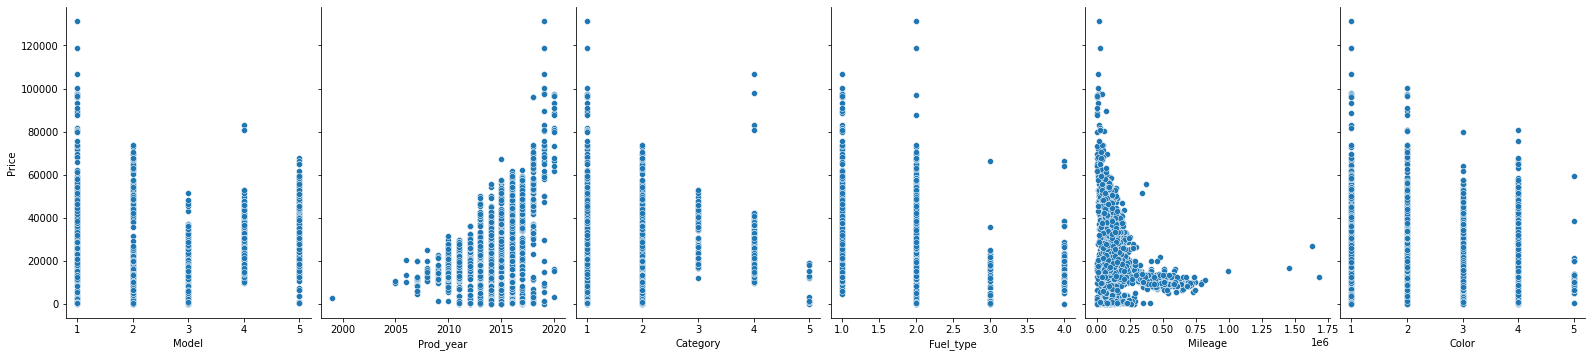

In [482]:
# Hubungan antara independent dan dependent variabel
plt.figure(figsize=(12, 4))
sns.pairplot(data=df8, x_vars=['Model', 'Prod_year', 'Category', 'Fuel_type', 'Mileage', 'Color'], y_vars=['Price'], height=5, aspect=0.75)
plt.show()

In [483]:
# Tabel korelasi dari independent dan dependent variabel
df8.corr().style.background_gradient().set_precision(2)

C:\Users\Nanda\AppData\Local\Temp\ipykernel_2256\918488026.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df8.corr().style.background_gradient().set_precision(2)


,Price,Model,Prod_year,Category,Fuel_type,Mileage,Color
Price,1.00,0.02,0.45,-0.14,-0.51,-0.33,-0.22
Model,0.02,1.00,-0.10,0.22,-0.34,-0.20,-0.08
Prod_year,0.45,-0.10,1.00,-0.06,0.12,-0.02,-0.02
Category,-0.14,0.22,-0.06,1.00,0.06,0.02,0.11
Fuel_type,-0.51,-0.34,0.12,0.06,1.00,0.52,0.28
Mileage,-0.33,-0.20,-0.02,0.02,0.52,1.00,0.34
Color,-0.22,-0.08,-0.02,0.11,0.28,0.34,1.00


- Nilai korelasi model hampir mendekati nol yang menandakan bahwa model tidak mempengaruhi harga mobil hyundai.

### **Modelling**

In [484]:
# Recall data
df8

,Price,Model,Prod_year,Category,Fuel_type,Mileage,Color
5,39493.0,1.0,2016.0,1.0,1.0,160931.0,1.0
8940,44213.0,5.0,2016.0,1.0,1.0,90924.0,1.0
8911,40387.0,1.0,2014.0,1.0,1.0,56809.0,1.0
8897,9500.0,4.0,2005.0,4.0,2.0,240000.0,1.0
8850,16308.0,2.0,2016.0,2.0,4.0,268872.0,1.0
...,...,...,...,...,...,...,...
18437,6429.0,2.0,2014.0,2.0,4.0,531500.0,5.0
18443,13172.0,2.0,2016.0,2.0,4.0,299337.0,5.0
2126,9252.0,2.0,2015.0,2.0,4.0,431626.0,5.0
18396,10036.0,2.0,2016.0,2.0,4.0,354569.0,5.0


In [485]:
# Variabel x dan y
x = df8.drop(columns='Price')
y = df8['Price']
# Split data menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
# Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2444, 6)
(2444,)
(612, 6)
(612,)


In [486]:
lin_reg = LinearRegression()
# Train model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)
# Nilai slope/koefisien (m) dan intercept (b)
print("m =", lin_reg.coef_)
print("b =", lin_reg.intercept_)

m = [-1.54438080e+03  3.23960355e+03 -9.94862496e+02 -8.56331859e+03
 -1.90873589e-03 -6.49508767e+02]
b = -6475548.084966956


In [487]:
coef_dict = {'features':x.columns, 'coef_value':lin_reg.coef_}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Model,-1544.380796
1,Prod_year,3239.603553
2,Category,-994.862496
3,Fuel_type,-8563.318586
4,Mileage,-0.001909
5,Color,-649.508767


- Nilai slope/koefisien (m) = coef_value
- Dari nilai m dan b, jika dimasukan ke dalam rumus menjadi:  
Y = - 1544.380796x1 + 3239.603553x2 - 994.862496x3 - 8563.318586x4 - 0.001909x5 - 649.508767x6 - 6475548.084966956

In [488]:
y_pred = lin_reg.predict(x_test)
# Accuracy score model menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.5166960285459431

- Model mendapatkan accuracy score sebesar 51.67%

### **Prediction**

In [489]:
print('-'*16, "KETERANGAN NOMOR DATA", '-'*16)
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

---------------- KETERANGAN NOMOR DATA ----------------
╒══════╤══════════╤════════════╤═════════════╤═════════╕
│   No │ Model    │ Category   │ Fuel_type   │ Color   │
╞══════╪══════════╪════════════╪═════════════╪═════════╡
│    1 │ Santa FE │ Jeep       │ Diesel      │ White   │
├──────┼──────────┼────────────┼─────────────┼─────────┤
│    2 │ Sonata   │ Sedan      │ Petrol      │ Grey    │
├──────┼──────────┼────────────┼─────────────┼─────────┤
│    3 │ Elantra  │ Universal  │ Hybrid      │ Silver  │
├──────┼──────────┼────────────┼─────────────┼─────────┤
│    4 │ H1       │ Minivan    │ LPG         │ Black   │
├──────┼──────────┼────────────┼─────────────┼─────────┤
│    5 │ Tucson   │ Hatchback  │ -           │ Orange  │
╘══════╧══════════╧════════════╧═════════════╧═════════╛


Memprediksi harga mobil hyundai sesuai dengan kriteria berikut:  
1. Model = Elantra (3)
2. Tahun produksi = 2012
3. Kategori = Sedan (2)
4. Tipe bahan bakar = Petrol (2)
5. Jarak tempuh (km) = 220000
6. Warna = White (1)

In [490]:
# Prediksi harga mobil hyundai
lin_reg.predict([[3,2012,2,2,220000,1]])

C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17715.3294589])

- Prediksi harga mobil hyundai dengan kriteria di atas adalah 17715 US$

Berikut ini adalah code untuk penginputan oleh user:

In [492]:
print("============================")
print("Prediksi Harga Mobil Hyundai")
print("============================")
s = "y"
while s == "y":
    print("----------------------------")
    a = float(input("Model ="))
    b = float(input("Tahun produksi ="))
    c = float(input("Kategori ="))
    d = float(input("Tipe bahan bakar ="))
    e = float(input("Jarak tempuh (km) ="))
    f = float(input("Warna ="))
    x = lin_reg.predict([[a,b,c,d,e,f]])
    print("Model =", a)
    print("Tahun produksi =", b)
    print("Kategori =", c)
    print("Tipe bahan bakar =", d)
    print("Jarak tempuh (km) =", e)
    print("Warna =", f)
    print(">>> Prediksi harga mobil hyundai dengan kriteria di atas adalah", x, "US$")
    s = input("Apakah anda ingin memprediksi lagi (y/t): ")
if s == "t":
    print("----------------------------")
    print("Prediksi telah selesai.")

Prediksi Harga Mobil Hyundai
----------------------------


C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model = 1.0
Tahun produksi = 2014.0
Kategori = 2.0
Tipe bahan bakar = 1.0
Jarak tempuh (km) = 230000.0
Warna = 3.0
>>> Prediksi harga mobil hyundai dengan kriteria di atas adalah [34528.51185167] US$
----------------------------


C:\Users\Nanda\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model = 2.0
Tahun produksi = 2013.0
Kategori = 1.0
Tipe bahan bakar = 1.0
Jarak tempuh (km) = 20000.0
Warna = 1.0
>>> Prediksi harga mobil hyundai dengan kriteria di atas adalah [32439.24206782] US$
----------------------------
Perhitungan telah selesai.


In [1]:
!jupyter nbconvert --to html LinearRegression_HyundaiCarPricePrediction.ipynb

[NbConvertApp] Converting notebook LinearRegression_HyundaiCarPricePrediction.ipynb to html
[NbConvertApp] Writing 916490 bytes to LinearRegression_HyundaiCarPricePrediction.html
